## Getting Started with the Maxar-OGC SDK.
This sample workflow will guide you through using the Maxar OGC SDK with real world examples.
The process will go through:
* Search for an image
* Select an image
* Download an image 
* Download full resolution image

##### To start with this workflow you need the .ogc-config file pre installed. See Documentation for installing .ogc-config file here https://cloudservices.readthedocs.io/en/latest/

#### Initialize the Maxar-OGC Module

In [1]:
from Maxar_OGC import Interface
try:
  sw_ogc = Interface() # if .ogc-config was created
except:
  sw_ogc = Interface('https://securewatch.maxar.com/','<connect_id>') # if .ogc-config was not created


#### Search for an Image
This function will search for imagery on the below Bbox. The return will be a dictionary containing metadata and results for your search.

In [2]:
bbox = "39.84387,-105.05608,39.95133,-104.94827"
search_results = sw_ogc.search(bbox=bbox)
print(search_results.keys())

dict_keys(['type', 'totalFeatures', 'features', 'crs'])


#### Select an Image
Next we will isolate the features from the results above. Below, features will be a list of dictionaries where each dictionary in the list is a unique feature.

In [3]:
features = search_results['features']
print(features)

[{'type': 'Feature', 'id': 'd330c2f9486b4b5b0798b142fd1e6388', 'geometry': {'type': 'Polygon', 'coordinates': [[[-105.03039223, 39.31293504], [-105.02809481, 39.78806079], [-105.02579739, 40.26318653], [-105.02392672, 40.26318653], [-105.02205605, 40.26318653], [-104.94839743, 40.26299485], [-104.8747388, 40.26280317], [-104.8724148, 39.79013714], [-104.87009081, 39.31747111], [-104.95023172, 39.31519188], [-105.03037264, 39.31291266], [-105.03038243, 39.31291266], [-105.03039223, 39.31291266], [-105.03039223, 39.31292385], [-105.03039223, 39.31293504]]]}, 'geometry_name': 'geometry', 'properties': {'featureId': 'd330c2f9486b4b5b0798b142fd1e6388', 'acquisitionDate': '2022-02-24 17:55:01', 'acquisitionTime': 1755, 'sensorType': '', 'source': 'WV03_VNIR', 'sourceUnit': 'Strip', 'productType': 'Pan Sharpened Natural Color', 'CE90Accuracy': '8.4 meters', 'RMSEAccuracy': '3.91 meters', 'cloudCover': 0, 'offNadirAngle': 11.367501, 'sunElevation': 37.906784, 'sunAzimuth': 155.38539, 'groundSa

In [4]:
WV02_features = [i for i in features if i['properties']['source'] == 'WV02']
print(WV02_features)

[{'type': 'Feature', 'id': 'b4f47111ff2464fb6b77ba24c7001ce3', 'geometry': {'type': 'Polygon', 'coordinates': [[[-105.16484461, 39.31478259], [-105.1616752, 39.78917983], [-105.15850578, 40.26357706], [-105.0597031, 40.26430112], [-104.96090042, 40.26502517], [-104.95757109, 39.79082339], [-104.95424177, 39.31662161], [-105.05936995, 39.31543114], [-105.16449813, 39.31424066], [-105.16467137, 39.31424066], [-105.16484461, 39.31424066], [-105.16484461, 39.31451163], [-105.16484461, 39.31478259]]]}, 'geometry_name': 'geometry', 'properties': {'featureId': 'b4f47111ff2464fb6b77ba24c7001ce3', 'acquisitionDate': '2022-01-31 18:00:39', 'acquisitionTime': 1800, 'sensorType': '', 'source': 'WV02', 'sourceUnit': 'Strip', 'productType': 'Pan Sharpened Natural Color', 'CE90Accuracy': '8.4 meters', 'RMSEAccuracy': '3.91 meters', 'cloudCover': 0.29602313, 'offNadirAngle': 19.576912, 'sunElevation': 30.671404, 'sunAzimuth': 159.6576, 'groundSampleDistance': 0.4, 'groundSampleDistanceUnit': 'Meter', 

Now we will select an image from our specified search. We want the most recent image so we will grab the first image in the WV02_features list.

In [5]:
desired_image = WV02_features[0]
desired_featureid = desired_image['id']
print(desired_image)
print(desired_featureid)

{'type': 'Feature', 'id': 'b4f47111ff2464fb6b77ba24c7001ce3', 'geometry': {'type': 'Polygon', 'coordinates': [[[-105.16484461, 39.31478259], [-105.1616752, 39.78917983], [-105.15850578, 40.26357706], [-105.0597031, 40.26430112], [-104.96090042, 40.26502517], [-104.95757109, 39.79082339], [-104.95424177, 39.31662161], [-105.05936995, 39.31543114], [-105.16449813, 39.31424066], [-105.16467137, 39.31424066], [-105.16484461, 39.31424066], [-105.16484461, 39.31451163], [-105.16484461, 39.31478259]]]}, 'geometry_name': 'geometry', 'properties': {'featureId': 'b4f47111ff2464fb6b77ba24c7001ce3', 'acquisitionDate': '2022-01-31 18:00:39', 'acquisitionTime': 1800, 'sensorType': '', 'source': 'WV02', 'sourceUnit': 'Strip', 'productType': 'Pan Sharpened Natural Color', 'CE90Accuracy': '8.4 meters', 'RMSEAccuracy': '3.91 meters', 'cloudCover': 0.29602313, 'offNadirAngle': 19.576912, 'sunElevation': 30.671404, 'sunAzimuth': 159.6576, 'groundSampleDistance': 0.4, 'groundSampleDistanceUnit': 'Meter', '

#### Download an Image
Now that we have isolated the feature that we want to download we will need to specify a download location on our machine.
Note: This sets the output location to the current working directory.

In [6]:
import os
output_location = os.getcwd()

Now we can proceed to download the jpeg of the image. The second line of the cell is optional and displays the image within Jupyter Notebooks

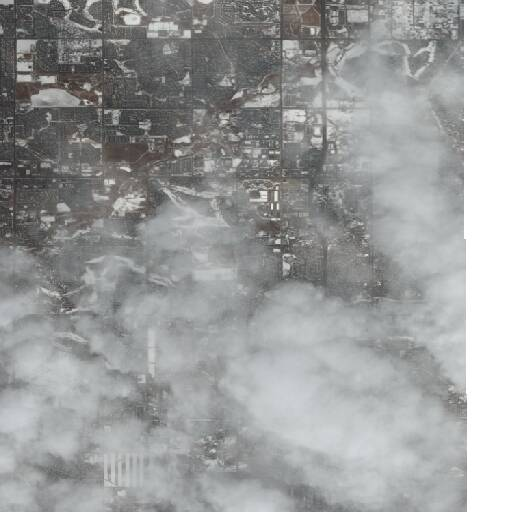

Downloaded file Download.jpeg


In [7]:
download_image = sw_ogc.download_image(bbox=bbox, height=512, width=512, img_format='jpeg', featurecollection=desired_featureid)
print(download_image)

#### Download Full Resolution Image

######  This will be a large download of several files. 
The following command will download the full resolution of the image strip. Printing the download_full_res object will return a message when the process is complete as well as the location of the files.

In [8]:
download_full_res = sw_ogc.get_full_res_image(desired_featureid, output_location=output_location)
print(download_full_res) 

Started full image download process...
........................................

Finished raw downloadFinished full image download process, output directory is: C:\Users\ty027972\Documents\CloudServices\ogc-sdk\Jupyter notebook examples


Included in the download will be a file name "Grid_cell_coordinates.txt" It will include a list of coordinates for all the downloaded image sections. With this you can reconstruct and geolocate the image. 